### DFS

*Algorithm Depth_First_Search* $(G, v)$;

**Input:** $G = (V, E)$ is an undirected connected graph, and $v$ is a vertex of $G$ as starting vertex of traversal.

**Output:** depends on the application

**begin**

    mark v;
    preform preWORK on v;
    for all edges (v, w) do
        if w is unmarked then Depth_First_Search(G, w);
        perform postWork for (v, w)

**end**

Lemma: If $G$ is *connected*, then all the vertices will be marked by *Depth_First_Search*, and all its edges will be looked at at least onece during the execution of the Depth_First_Search.

Note: DFS can be implemented by using a stack!

In [1]:
# Q: can you use DFS to build a DFS Tree?
# A: postWork: if w was unmarked, then add the edge (v,w) to a tree T

P.S. DFS_Numbering

Everytime we mark $v$ in DFS, we assign a number (starting from 1) to $v$. Then, increase the number. This number is called **DFS numbers**.

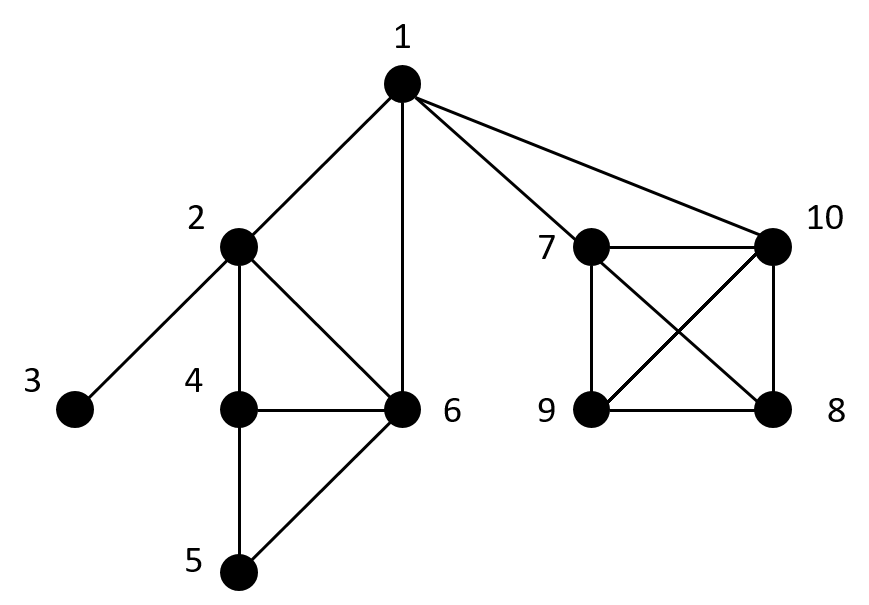

In [2]:
from IPython.display import Image
Image(filename='dfs.png', width=400)

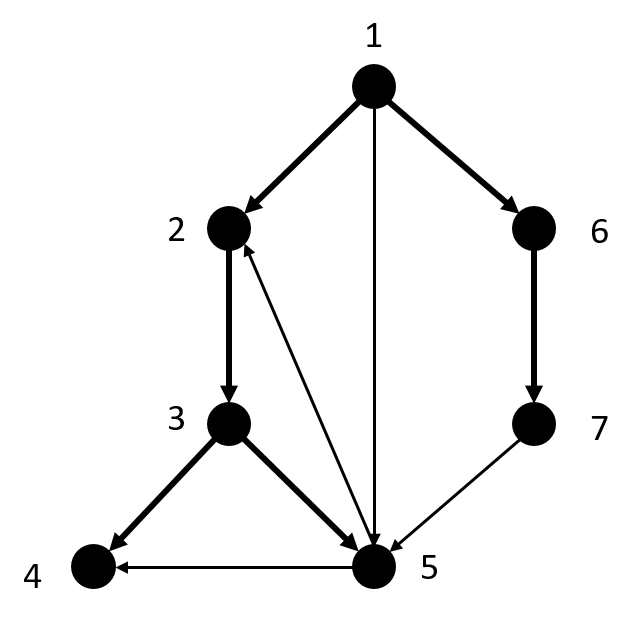

In [3]:
Image(filename='dfstree_direct.png', width=300)

In [4]:
# Q: can you use DFS Tree (directed graph) to find a cycle?

# tree edge: 1->2, 2->3, 3->4, 3->5, 1->6, 6->7
# back edge (from descendants to ancestors): 5->2 <-----------cycle
# forward edge (from ancestors to descendants): 1->5
# cross edge (cross from 'right to left'): 5->4, 7->5

## BFS

In [5]:
# Can you draw the BFS tree of the previous figure? 

*Algorithm Breadth_First_Search* $(G, v)$;

**Input:** $G = (V, E)$ is an undirected connected graph, and $v$ is a vertex of $G$ as starting vertex of traversal.

**Output:** depends on the application

**begin**

    mark v;
    put v in a queue;
    while the queue is not empty do
        remove the first vertex w from the queue;
        preform preWORK on v;
        for all edges (w, x) such that x is unmarked do
            mark x;
            add (w, x) to the tree T;
            put x in the queue;

**end**

### Topological Sorting

Given a directed acyclic graph $G = (V, E)$ with $n$ verteices, label the vertices from 1 to $n$ such that, if $v$ is labeled $k$, then all vertices that can be reached from $v$ by a directed path are labeled with label $>k$.

Lemma: A directed acyclic graph always contains a vertex with indegree 0.


*Algorithm Topological_Sorting* $(G)$;

**Input:** $G = (V, E)$ is a directed acyclic graph.

**Output:** The Label field indicates a topological sorting of G.

**begin**

    Initialize v.Indegree for all vertices; {e.g., by DFS}
    G_label := 0
    for i := 1 to n do
        if i.Indegree = 0 then put i in Queue; {See Lemma}
        
    repeat
        remove vertex v from Queue;
        G_label := G_label + 1
        v.label := G_label
        for all edges (v, w) do
            w.Indegree := w.Indegree - 1; {Update!}
            if w.Indegree = 0 then put w in Queue; {Check if no previous vertex!}
    until Queue is empty;

**end**

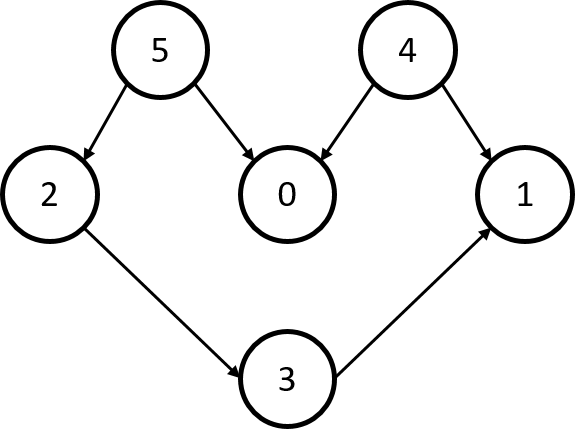

In [6]:
Image(filename='topologicalsorting.png', width=400)

In [7]:
# topological sorting could have multiple results.
# 5 4 2 3 1 0
# 4 5 2 3 1 0
# ...

### Single Source Shortest Paths (Dijkstra)


Given a directed acyclic graph $G = (V, E)$ and a vertex $v$, find the shorest paths from $v$ to all other verticex of $G$.


*Algorithm Single_Source_Shortest_Paths* $(G, v)$;

**Input:** $G = (V, E)$ is a weighted directed graph, and v is the source vertex.

**Output:** For each vertex w, w.SP is the length of the shortest path from v to w.

**begin**

    for all vertices w do
        w.mark := false;
        w.SP := infinite;
    v.SP = 0;
    
    while there exists an unmarked vertex do {O(|V|)}
        let w be an unmarked vertex such that w.SP is minimal; {minheap, find minimal needs O(1), rebuild needs O(log|V|)}
        w.mark := true;
        
        for all edges (w, z) such that z is unmarked do {O(|E|)}
            if w.SP + length(w, z) < z.SP then
                z.SP := w.SP + length(w, z) {minheap, rebuild needs O(log|V|)}

**end**

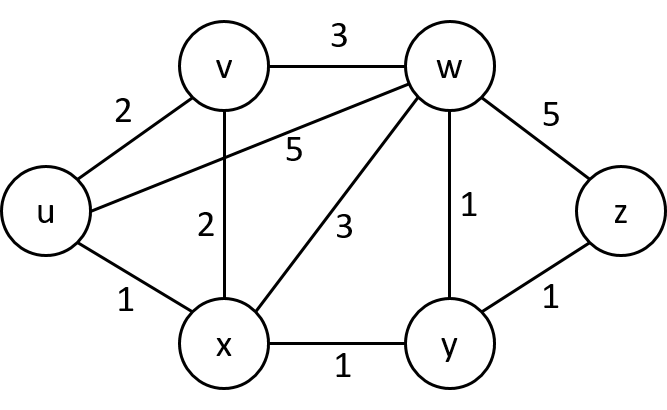

In [8]:
Image(filename='dijkstra.png', width=400)